# Homework Assignment (Analyzing Distributions)

Assignment instructions:

1. Use [Google Co-lab](https://colab.research.google.com/) (or Jupyter)
2. Save your workbook to a Github repository
3. The first person to solve this and post their repo in the comments below will get a huge shout-out!

Part 1:
* Follow the [“Histograms and Density Plots in Python” tutorial](https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0) to figure out which airline is most likely to get you to your destination on time.
* Download the data file (formatted_flights.csv) [here](https://github.com/WillKoehrsen/Data-Analysis/tree/master/univariate_dist/data)
* Tell us which airline you choose and why.

Part 2:
* Use the same airline data to demonstrate (or disprove) the four aspects of the Central Limit Theorem (from Central  Limit Theorem video).
* Hint: take repeated random samples of a specific size and measure the mean and standard deviation of each one.
* Graph your results. Does it look like a normal distribution?
* How does sample size affect your results?

### Dependencies

In [0]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

%matplotlib inline
warnings.filterwarnings("ignore")

### Load files

In [2]:
# Google Co-lab script to upload files from local system.
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving formatted_flights.csv to formatted_flights (1).csv
User uploaded file "formatted_flights.csv" with length 10420748 bytes


#### Let's take a look at the data

In [3]:
flights = pd.read_csv('formatted_flights.csv', usecols=['arr_delay', 'name'])
flights.head(10)

,arr_delay,name
0,11.0,United Air Lines Inc.
1,20.0,United Air Lines Inc.
2,33.0,American Airlines Inc.
3,-18.0,JetBlue Airways
4,-25.0,Delta Air Lines Inc.
5,12.0,United Air Lines Inc.
6,19.0,JetBlue Airways
7,-14.0,ExpressJet Airlines Inc.
8,-8.0,JetBlue Airways
9,8.0,American Airlines Inc.


### Flight delay histogram

To begin our exploration let's start with a simple histogram.

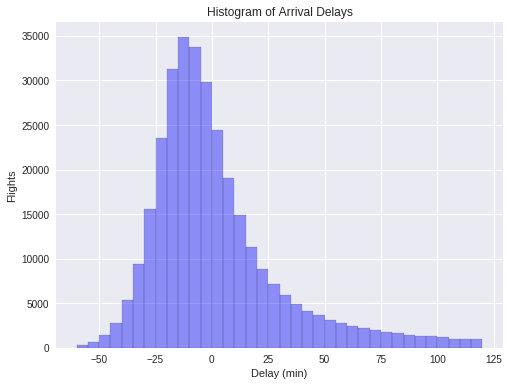

In [4]:
f = plt.figure(figsize=(8, 6))
sns.distplot(flights['arr_delay'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')
plt.show()

Seaborn histogram as well as the MatPlotLib version have a parameter called **"binwidth"**, it controls the size of each bin on the histogram. Let's look at the same plot but using different binwidth values.

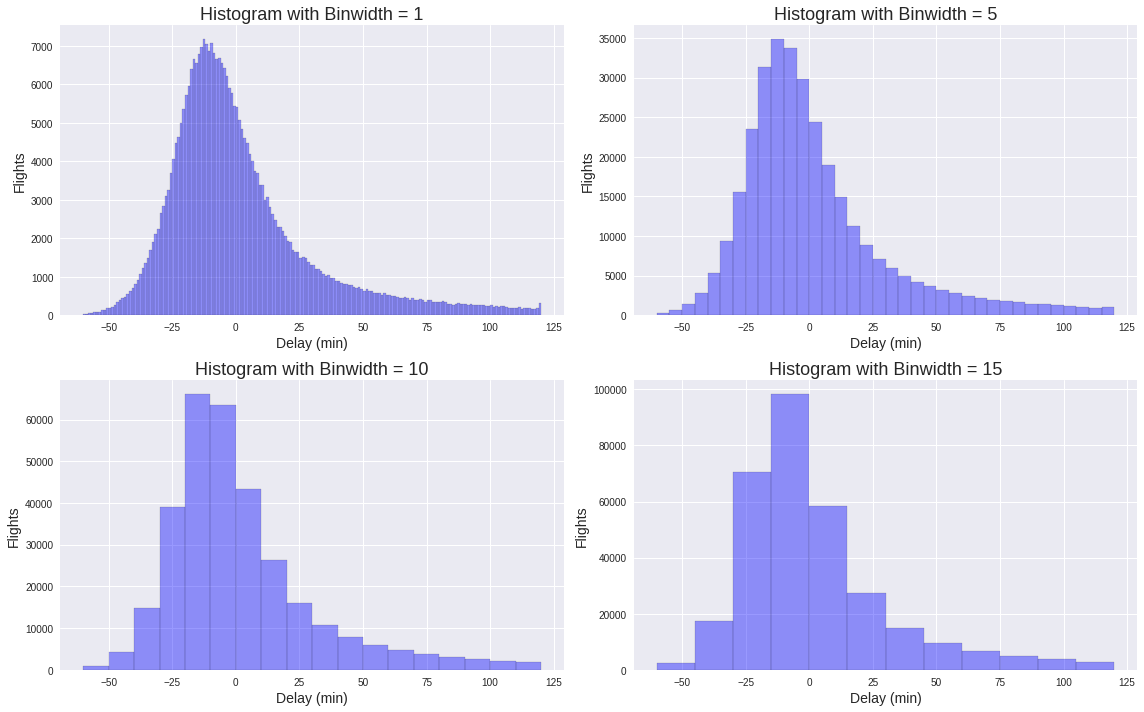

In [5]:
f = plt.figure(figsize=(16, 10))
for i, binwidth in enumerate([1, 5, 10, 15]):
    ax = f.add_subplot(2, 2, i + 1)
    
    sns.distplot(flights['arr_delay'], hist=True, kde=False, 
             bins=int(180/binwidth), color = 'blue',
             hist_kws={'edgecolor':'black'}, ax=ax)
    
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 18)
    ax.set_xlabel('Delay (min)', size = 14)
    ax.set_ylabel('Flights', size= 14)
    
plt.tight_layout()
plt.show()

Now let's see the histogram by category

### Side-by-Side Histogram by categories

In [0]:
airlines = flights['name'].unique()
airlines_flights = [flights[flights['name'] == a]['arr_delay'] for a in airlines]

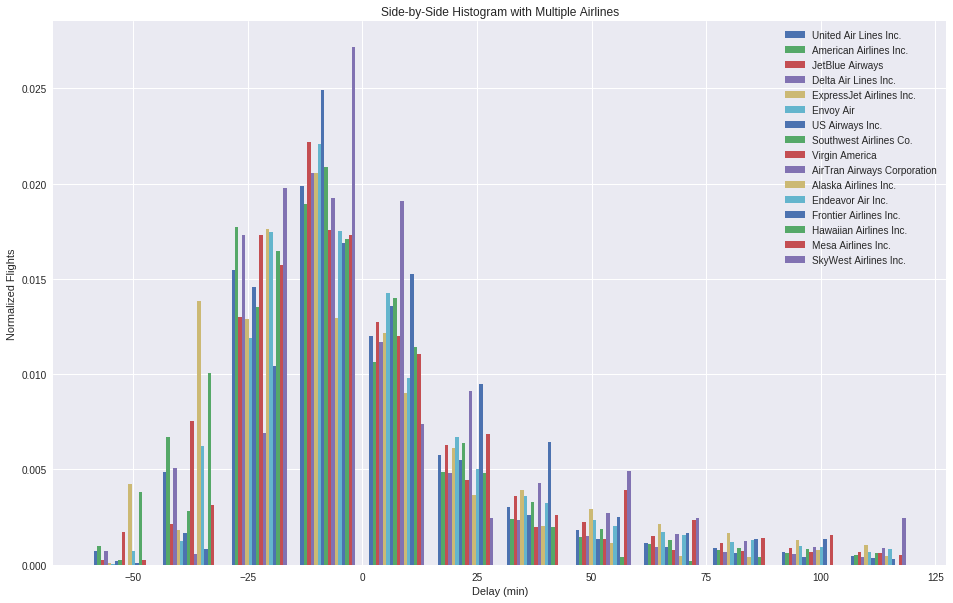

In [7]:
plt.figure(figsize=(16, 10))
plt.hist(airlines_flights, bins = int(180/15), normed=True, label=airlines)

plt.legend()
plt.xlabel('Delay (min)')
plt.ylabel('Normalized Flights')
plt.title('Side-by-Side Histogram with Multiple Airlines')
plt.show()

### Stacked bars histogram

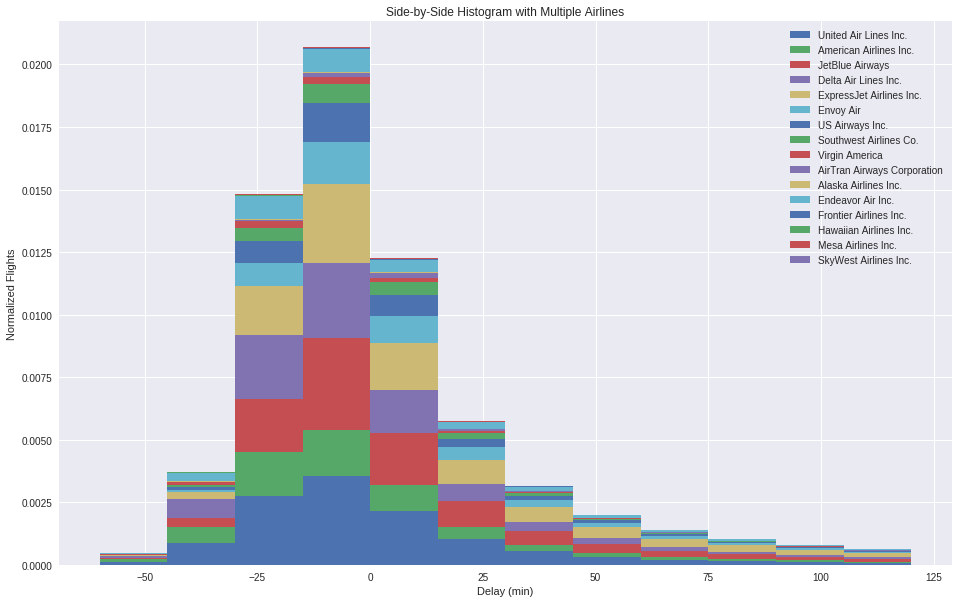

In [8]:
plt.figure(figsize=(16, 10))
plt.hist(airlines_flights, bins = int(180/15), normed=True, label=airlines, stacked=True)

plt.legend()
plt.xlabel('Delay (min)')
plt.ylabel('Normalized Flights')
plt.title('Side-by-Side Histogram with Multiple Airlines')
plt.show()

Both the Side-by-Side and the Stacked bars histograms aren't great ways to visualize this kind of data, there are too many categories then things get a little noisy. One way to solve this is by using density plots.

### Density plot

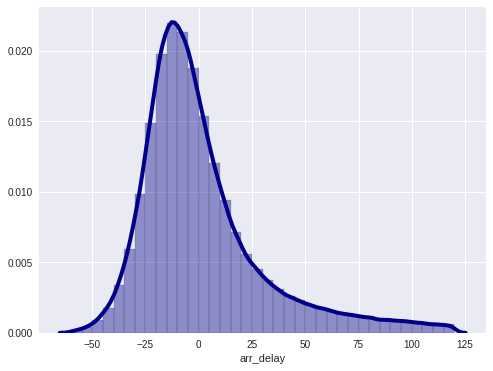

In [9]:
f = plt.figure(figsize=(8, 6))
sns.distplot(flights['arr_delay'], hist=True, kde=True, 
             bins=int(180/5), color='darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.show()

#### Now for each category

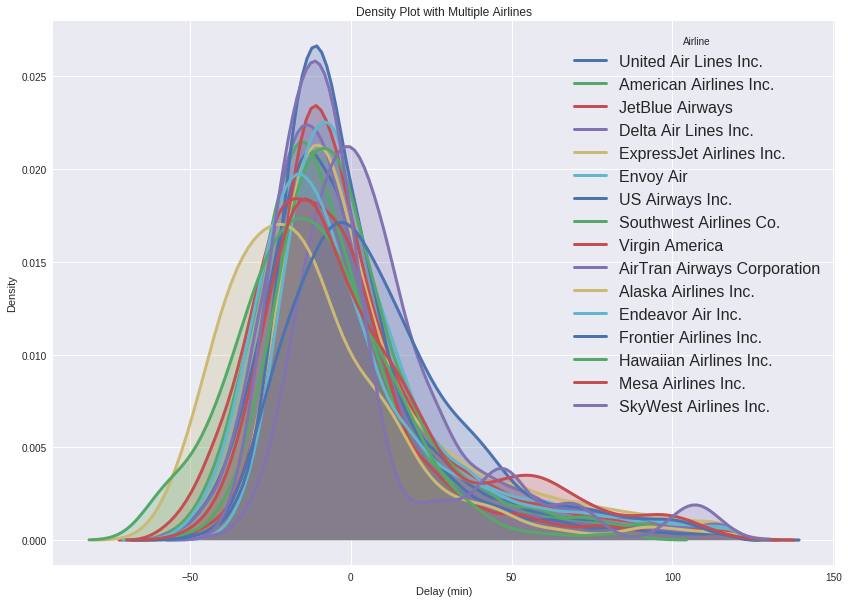

In [10]:
f = plt.figure(figsize=(14, 10))
for idx, airline in enumerate(airlines):
    sns.distplot(airlines_flights[idx], hist=False, kde=True,
                 kde_kws={'linewidth': 3, 'shade': True},
                 label=airline)

plt.legend(prop={'size': 16}, title='Airline')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')
plt.show()

This way is easier to see which airline (Alaska Airlines Inc.) has a positive (left-side) skewness, that means less delays.

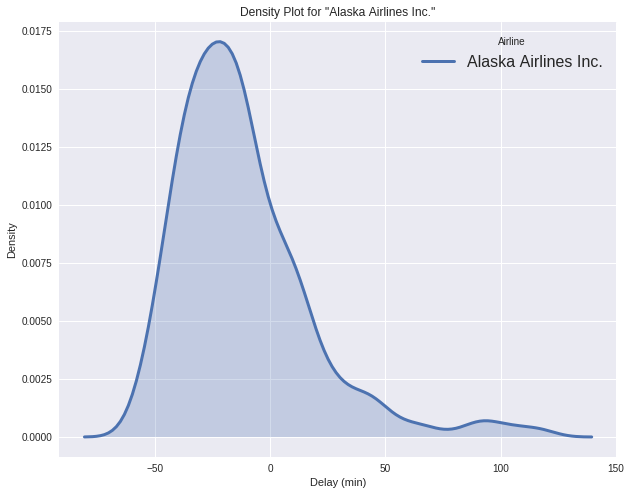

In [11]:
f = plt.figure(figsize=(10, 8))
best_airline = 'Alaska Airlines Inc.'
sns.distplot([flights[flights['name'] == best_airline]['arr_delay']], 
             hist=False, kde=True, kde_kws = {'linewidth': 3, 'shade': True}, 
             label=best_airline)

plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot for "%s"' % best_airline)
plt.xlabel('Delay (min)')
plt.ylabel('Density')
plt.show()

#### Just a tip, another way we could look at this in by removing the arrivals lesser than 0, maybe for us matter just delayed arrivals, not the ones that arrive early.

But now the distributions get noisy again.

In [0]:
flights_positive = flights[flights['arr_delay'] >= 0]
airlines_flights_positive = flights_positive['name'].unique()
airlines_flightsflights_positive = [flights_positive[flights_positive['name'] == a]['arr_delay'] for a in airlines_flights_positive]

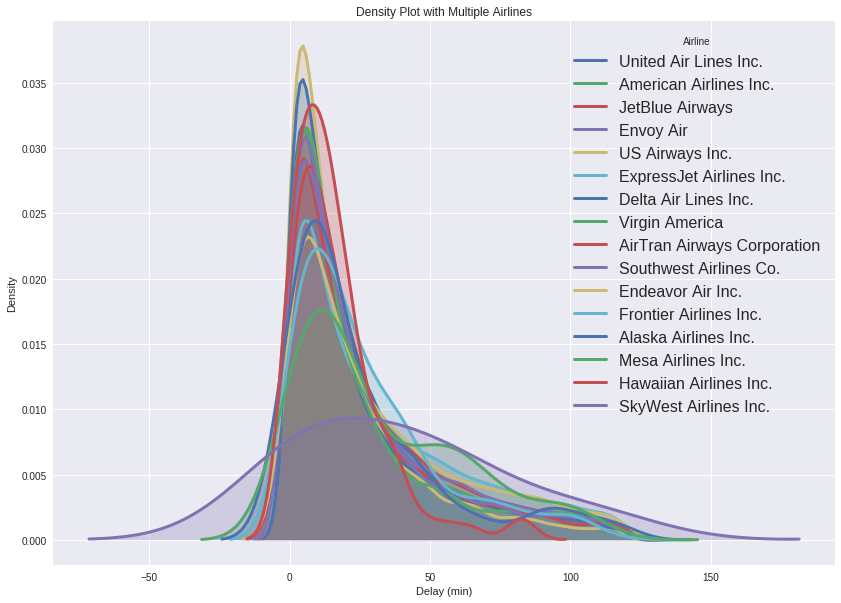

In [13]:
f = plt.figure(figsize=(14, 10))
for idx, airline in enumerate(airlines_flights_positive):
    sns.distplot(airlines_flightsflights_positive[idx], hist=False, kde=True,
                 kde_kws={'linewidth': 3, 'shade': True}, label=airline)

plt.legend(prop={'size': 16}, title='Airline')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')
plt.show()

## Homework Assignment (Analyzing Distributions)

### Part 1:
**Figure out which airline is most likely to get you to your destination on time, tell us which airline you choose and why:** 

The airline that is most likely to get me to my destination on time is the "Alaska Airlines Inc.", as you can see it is the airline that has it's probability density more concentrated on the left, so it means that it is the most likely to have a lower delay.

### Part 2:

* Use the same airline data to demonstrate (or disprove) the four aspects of the Central Limit Theorem (from Central Limit Theorem video).
* Hint: take repeated random samples of a specific size and measure the mean and standard deviation of each one.
* Graph your results. Does it look like a normal distribution?
* How does sample size affect your results?


 #### Four aspects of the Central Limit Theorem
 1. The sampling distribution of the mean will be less spread than the values in the population from which the sample is drawn.
 2. The sampling distribution will be well-modeled by a normal distribution (and it will get closer with larger sample sizes).
 3. The spread of the sampling distribution is related to the spread of the population values (mean = u, std dev = o / sqrt(n)).
 4. Bigger samples lead to a smaller spread in the sampling distribution (self evident from the equation above).

In [0]:
# Sampling 0.01% of the data.
sample = flights.sample(frac=0.0001, replace=True, random_state=0)

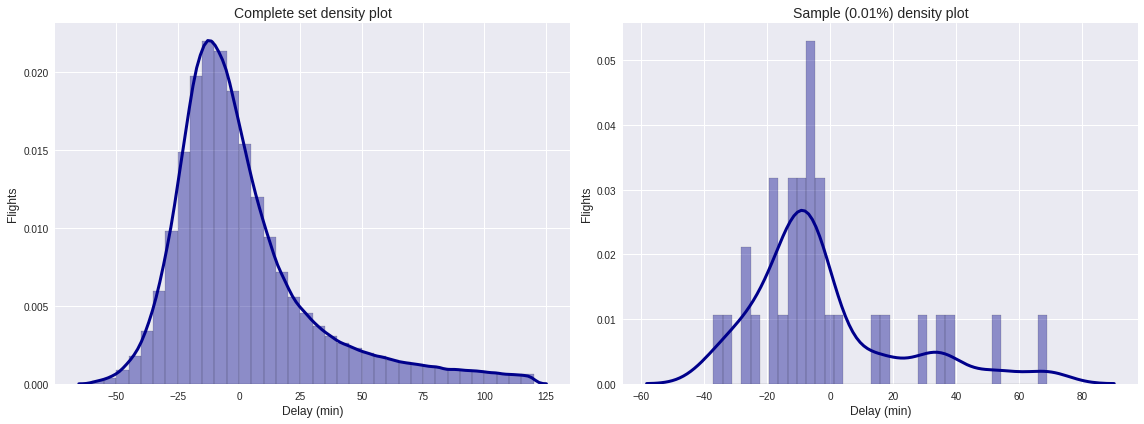

In [15]:
fig, ax = plt.subplots(1,2, figsize=(16, 6))

sns.distplot(flights['arr_delay'], hist=True, kde=True, 
             bins=int(180/5), color='darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3}, ax=ax[0])

sns.distplot(sample['arr_delay'], hist=True, kde=True, 
             bins=int(180/5), color='darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3}, ax=ax[1])

ax[0].set_xlabel('Delay (min)', size = 12)
ax[0].set_ylabel('Flights', size= 12)
ax[0].set_title('Complete set density plot', size = 14)
ax[1].set_xlabel('Delay (min)', size = 12)
ax[1].set_ylabel('Flights', size= 12)
ax[1].set_title('Sample (0.01%) density plot', size = 14)
plt.tight_layout()
plt.show()

### 1. The sampling distribution of the mean will be less spread than the values in the population from which the sample is drawn.

As we can see below the sampled data is less spread than the complete set, standard deviation from complete set is **29.06** and the sampled data has **24.22** standard deviation.

In [16]:
print('Complete data')
print('Mean: %.2f' % flights['arr_delay'].mean())
print('Std: %.2f' % flights['arr_delay'].std())
print('Sample (10%) data')
print('Mean: %.2f' % sample['arr_delay'].mean())
print('Std: %.2f' % sample['arr_delay'].std())

Complete data
Mean: 1.30
Std: 29.06
Sample (10%) data
Mean: -2.22
Std: 24.22


###  2. The sampling distribution will be well-modeled by a normal distribution (and it will get closer with larger sample sizes).

I wouldn't say that to all samples, it's more something like, the sampled data will have a distribution that looks like the original data, and the bigger the sample is, more closer they will be.

In [0]:
samples = []
sample_sizes = [0.0001, 0.001, 0.01, 0.1]
for sample_size in  sample_sizes:
  samples.append(flights.sample(frac=sample_size, replace=True, random_state=0))

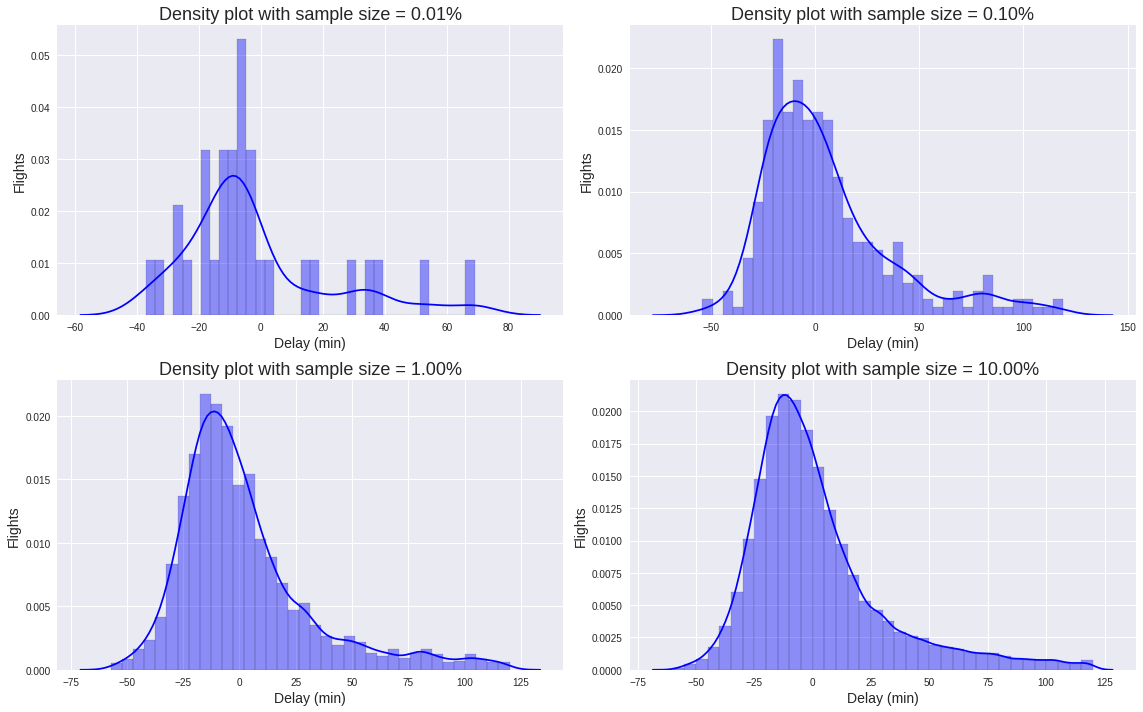

In [18]:
f = plt.figure(figsize=(16, 10))
for i, size in enumerate(sample_sizes):
    ax = f.add_subplot(2, 2, i + 1)
    
    sns.distplot(samples[i]['arr_delay'], hist=True, kde=True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'}, ax=ax)
    
    ax.set_title('Density plot with sample size = %.2f%%' % (size*100), size = 18)
    ax.set_xlabel('Delay (min)', size = 14)
    ax.set_ylabel('Flights', size= 14)
    
plt.tight_layout()
plt.show()

Another way to compare the sample distributions

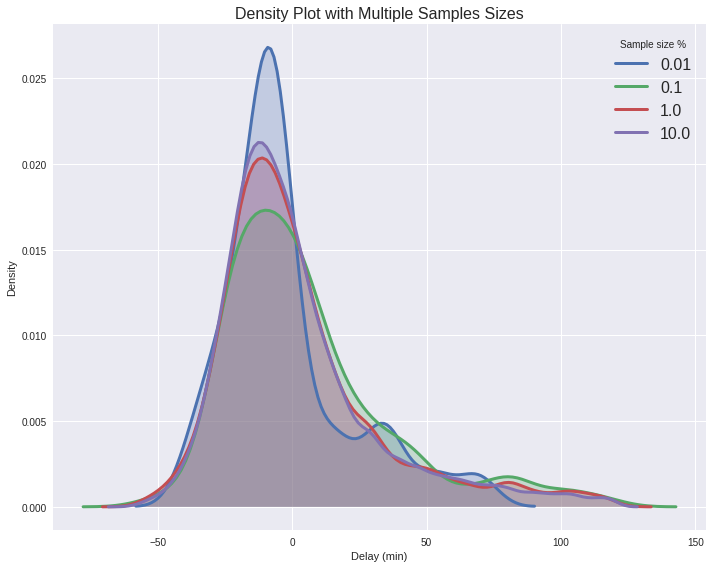

In [19]:
f = plt.figure(figsize=(10, 8))
for i, size in enumerate(sample_sizes):
    sns.distplot(samples[i]['arr_delay'], hist=False, kde=True,
                 kde_kws={'linewidth': 3, 'shade': True},
                 label=(size*100))
    
plt.legend(prop={'size': 16}, title='Sample size %')
plt.title('Density Plot with Multiple Samples Sizes', size=16)
plt.xlabel('Delay (min)')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

###  3. The spread of the sampling distribution is related to the spread of the population values (mean = u, std dev = o / sqrt(n)).

 ### 4. Bigger samples lead to a smaller spread in the sampling distribution (self evident from the equation above).
 
 As shown below  using the equation from **rule 3** the bigger is the sample, the smaller is the spread.

In [20]:
pop_mean = flights['arr_delay'].mean()
pop_std = flights['arr_delay'].std()
pop_rule_std = pop_std/np.sqrt(len(flights))

for i, size in enumerate(sample_sizes):
  sample_mean = samples[i]['arr_delay'].mean()
  sample_std = samples[i]['arr_delay'].std()
  sample_rule_std = pop_std/np.sqrt(len(samples[i]))
  print('%.2f%% sample, size = %d' % ((size*100), len(samples[i])))
  print('   Mean = %.2f and STD = %.2f, from the rule STD = %.2f' % (sample_mean, sample_std, sample_rule_std))
  
print('Complete set, size = %d' % len(flights))
print('   Mean = %.2f and STD = %.2f, from the rule STD = %.2f' % (pop_mean, pop_std, pop_rule_std))

0.01% sample, size = 32
   Mean = -2.22 and STD = 24.22, from the rule STD = 5.14
0.10% sample, size = 317
   Mean = 5.39 and STD = 31.32, from the rule STD = 1.63
1.00% sample, size = 3171
   Mean = 2.14 and STD = 30.09, from the rule STD = 0.52
10.00% sample, size = 31711
   Mean = 1.39 and STD = 29.06, from the rule STD = 0.16
Complete set, size = 317113
   Mean = 1.30 and STD = 29.06, from the rule STD = 0.05


### Graph your results. Does it look like a normal distribution?

### How does sample size affect your results?

They don't really look like a normal distribution, and as the sample size increases they look even less, it's more like a Poisson distribution with a negative (right-side) skewness.